In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import pandas as pd
import numpy as np
from collections import defaultdict
import cv2

In [2]:
TRAIN_DIR = '../raw/train-image/image'

def get_train_file_path(image_id):
    return f"{TRAIN_DIR}/{image_id}.jpg"

In [3]:
df = pd.read_csv('../raw/train-metadata.csv')
df.head(2)

/tmp/ipykernel_282435/163537997.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../raw/train-metadata.csv')


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455


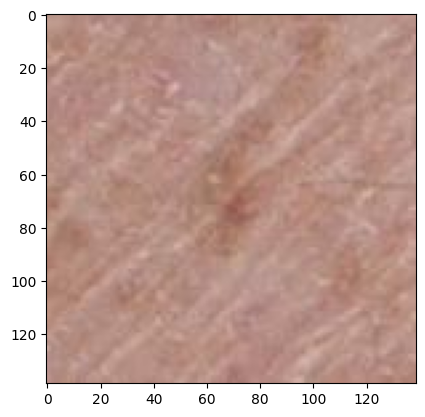

In [4]:
image_id = df.iloc[0]['isic_id']
image_path = get_train_file_path(image_id)
img = Image.open(image_path)
plt.imshow(img)
plt.show()

In [5]:
img_array = np.array(img)
img_array.shape

(139, 139, 3)

In [6]:
# 最初の5つのisic_idを取得
image_ids = df['isic_id'].head(5).tolist()

# 各画像の統計情報を格納するリスト
image_stats = []

for image_id in image_ids:
    image_path = get_train_file_path(image_id)
    img = Image.open(image_path)
    img_array = np.array(img)
    
    stats = {
        'isic_id': image_id,
        '形状': img_array.shape,
        '最小値': img_array.min(),
        '最大値': img_array.max(),
        '平均値': img_array.mean(),
        '標準偏差': img_array.std()
    }
    image_stats.append(stats)

# 結果を表示
for stat in image_stats:
    print(f"画像ID: {stat['isic_id']}")
    print(f"  形状: {stat['形状']}")
    print(f"  最小値: {stat['最小値']}")
    print(f"  最大値: {stat['最大値']}")
    print(f"  平均値: {stat['平均値']:.2f}")
    print(f"  標準偏差: {stat['標準偏差']:.2f}")
    print()

画像ID: ISIC_0015670
  形状: (139, 139, 3)
  最小値: 79
  最大値: 225
  平均値: 151.79
  標準偏差: 23.91

画像ID: ISIC_0015845
  形状: (127, 127, 3)
  最小値: 46
  最大値: 251
  平均値: 137.70
  標準偏差: 33.37

画像ID: ISIC_0015864
  形状: (145, 145, 3)
  最小値: 61
  最大値: 237
  平均値: 160.61
  標準偏差: 38.22

画像ID: ISIC_0015902
  形状: (109, 109, 3)
  最小値: 8
  最大値: 131
  平均値: 66.43
  標準偏差: 26.37

画像ID: ISIC_0024200
  形状: (125, 125, 3)
  最小値: 57
  最大値: 212
  平均値: 128.51
  標準偏差: 29.67



In [7]:
# patient_idごとの画像統計量を計算する関数
def calculate_patient_image_stats(df, patient_ids):
    patient_stats = {}
    image_ids = df['isic_id'].values
    
    for patient_id in patient_ids:
        patient_mask = df["patient_id"].values == patient_id
        patient_image_ids = image_ids[patient_mask]
        
        patient_stats[patient_id] = {
            '画像数': len(patient_image_ids),
            '形状': [],
            '最小値': [],
            '最大値': [],
            '平均値': [],
            '標準偏差': []
        }
        
        for image_id in patient_image_ids:
            image_path = get_train_file_path(image_id)
            img_array = np.array(Image.open(image_path))
            
            patient_stats[patient_id]['形状'].append(img_array.shape)
            patient_stats[patient_id]['最小値'].append(img_array.min())
            patient_stats[patient_id]['最大値'].append(img_array.max())
            patient_stats[patient_id]['平均値'].append(img_array.mean())
            patient_stats[patient_id]['標準偏差'].append(img_array.std())
    
    return patient_stats

# 最初の20人の患者のデータを使用
unique_patient_ids = df["patient_id"].unique().tolist()[:20]
patient_stats = calculate_patient_image_stats(df, unique_patient_ids)

# 結果を表示
for patient_id, stats in patient_stats.items():
    print(f"患者ID: {patient_id}")
    print(f"  画像数: {stats['画像数']}")
    # print(f"  形状: {stats['形状']}")
    # print(f"  最小値: 平均 {np.mean(stats['最小値']):.2f}, 標準偏差 {np.std(stats['最小値']):.2f}")
    # print(f"  最大値: 平均 {np.mean(stats['最大値']):.2f}, 標準偏差 {np.std(stats['最大値']):.2f}")
    print(f"  平均値: 平均 {np.mean(stats['平均値']):.2f}, 標準偏差 {np.std(stats['平均値']):.2f}")
    print(f"  標準偏差: 平均 {np.mean(stats['標準偏差']):.2f}, 標準偏差 {np.std(stats['標準偏差']):.2f}")
    print()


患者ID: IP_1235828
  画像数: 510
  平均値: 平均 141.08, 標準偏差 13.87
  標準偏差: 平均 29.12, 標準偏差 5.44

患者ID: IP_8170065
  画像数: 113
  平均値: 平均 158.08, 標準偏差 16.86
  標準偏差: 平均 25.27, 標準偏差 6.98

患者ID: IP_6724798
  画像数: 1859
  平均値: 平均 131.67, 標準偏差 27.02
  標準偏差: 平均 32.92, 標準偏差 6.25

患者ID: IP_4111386
  画像数: 541
  平均値: 平均 132.94, 標準偏差 30.99
  標準偏差: 平均 36.08, 標準偏差 7.92

患者ID: IP_8313778
  画像数: 440
  平均値: 平均 141.27, 標準偏差 18.99
  標準偏差: 平均 26.46, 標準偏差 6.59

患者ID: IP_3026693
  画像数: 542
  平均値: 平均 148.70, 標準偏差 14.36
  標準偏差: 平均 29.35, 標準偏差 5.05

患者ID: IP_0218255
  画像数: 1394
  平均値: 平均 142.06, 標準偏差 27.66
  標準偏差: 平均 34.28, 標準偏差 6.27

患者ID: IP_7734648
  画像数: 1003
  平均値: 平均 134.30, 標準偏差 30.69
  標準偏差: 平均 38.93, 標準偏差 6.39

患者ID: IP_1307115
  画像数: 295
  平均値: 平均 148.18, 標準偏差 16.81
  標準偏差: 平均 25.85, 標準偏差 5.15

患者ID: IP_2180091
  画像数: 99
  平均値: 平均 144.13, 標準偏差 29.63
  標準偏差: 平均 34.89, 標準偏差 6.60

患者ID: IP_7792811
  画像数: 875
  平均値: 平均 128.76, 標準偏差 25.87
  標準偏差: 平均 39.29, 標準偏差 5.33

患者ID: IP_4934005
  画像数: 976
  平均値: 平均 146.03, 標準偏差 1

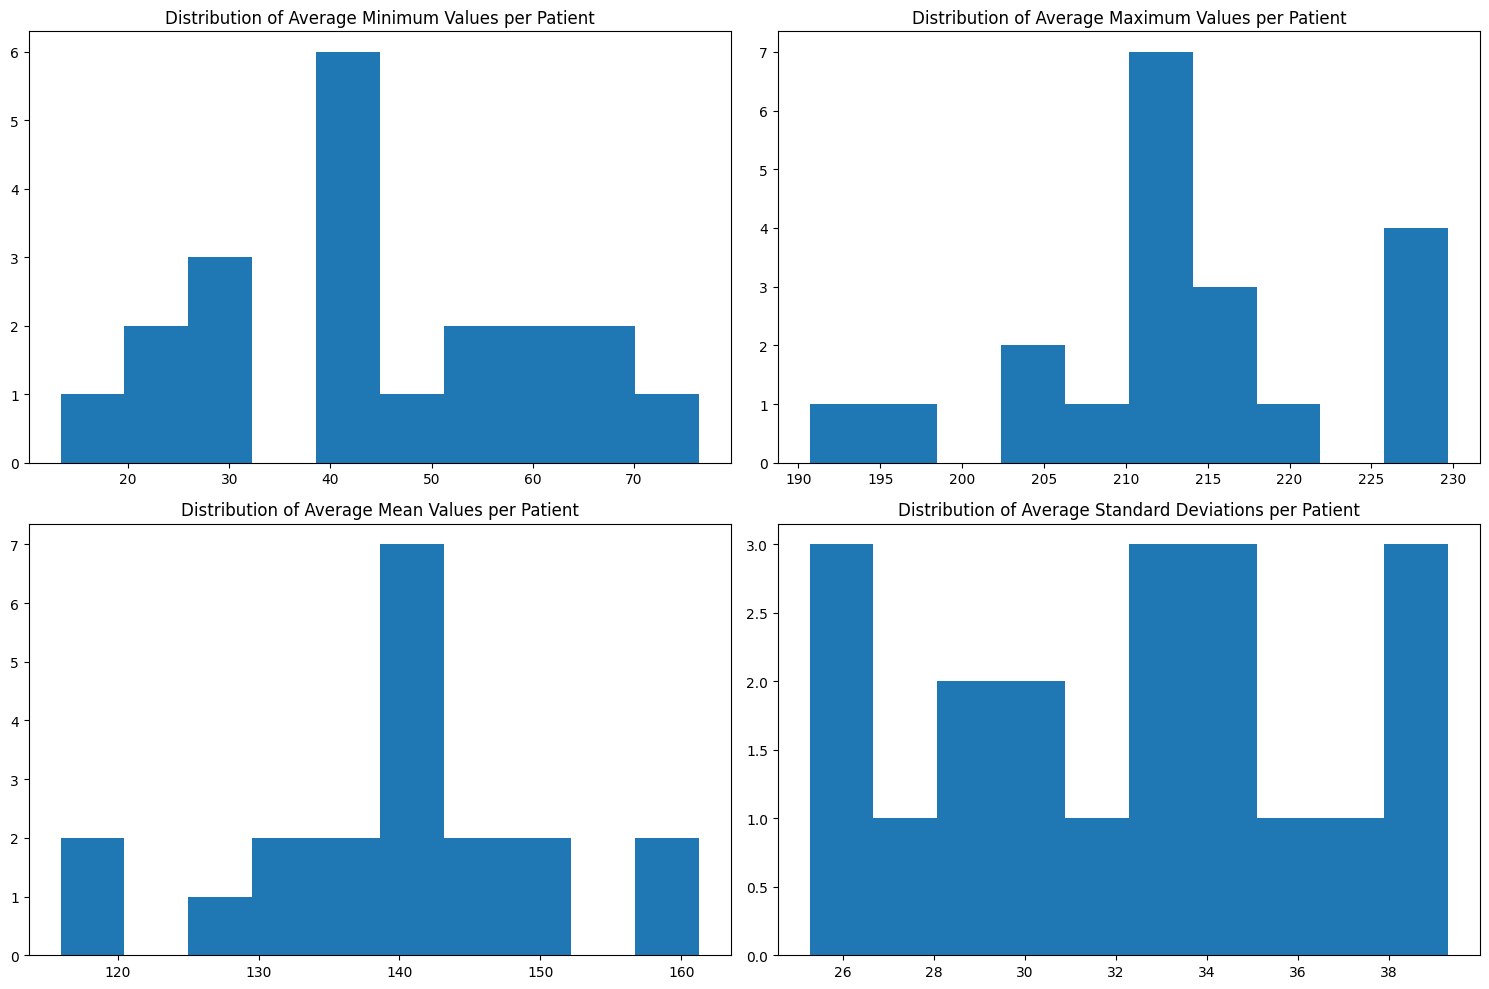

In [8]:
# 患者ごとの画像統計量の分布をプロットする
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist([np.mean(stats['最小値']) for stats in patient_stats.values()])
plt.title('Distribution of Average Minimum Values per Patient')

plt.subplot(2, 2, 2)
plt.hist([np.mean(stats['最大値']) for stats in patient_stats.values()])
plt.title('Distribution of Average Maximum Values per Patient')

plt.subplot(2, 2, 3)
plt.hist([np.mean(stats['平均値']) for stats in patient_stats.values()])
plt.title('Distribution of Average Mean Values per Patient')

plt.subplot(2, 2, 4)
plt.hist([np.mean(stats['標準偏差']) for stats in patient_stats.values()])
plt.title('Distribution of Average Standard Deviations per Patient')

plt.tight_layout()
plt.show()

In [9]:
# 1. 各patient_idごとの平均値と標準偏差を計算
def calculate_patient_stats(df):
    patient_stats = defaultdict(lambda: {'mean': np.zeros(3), 'std': np.zeros(3), 'count': 0})
    
    patient_ids = df["patient_id"].values[:1000]
    isic_ids = df["isic_id"].values
    for patient_id, isic_id in zip(patient_ids, isic_ids):
        img_path = get_train_file_path(isic_id)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # patient_stats[patient_id]['sum'] += np.sum(img, axis=(0, 1))
        patient_stats[patient_id]['mean'] += np.mean(img, axis=(0, 1))
        # patient_stats[patient_id]['sum_sq'] += np.sum(np.square(img), axis=(0, 1))
        patient_stats[patient_id]['std'] += np.std(img, axis=(0, 1))
        patient_stats[patient_id]['count'] += 1
    
    for patient_id, stats in patient_stats.items():
        mean = stats['mean'] / stats['count']
        std = stats['std'] / stats['count']
        patient_stats[patient_id] = {'mean': mean, 'std': std}
    
    return patient_stats

# 2. 計算した統計値を保存
patient_stats = calculate_patient_stats(df)

In [10]:
patient_stats

defaultdict(<function __main__.calculate_patient_stats.<locals>.<lambda>()>,
            {'IP_1235828': {'mean': array([170.88688675, 129.68288226, 113.504589  ]),
              'std': array([ 8.67246584, 10.13604629, 11.34165138])},
             'IP_8170065': {'mean': array([180.22152644, 122.98449997, 109.89552979]),
              'std': array([12.96762062, 13.89988411, 13.49855031])},
             'IP_6724798': {'mean': array([161.27262472, 122.2681218 ,  95.6845653 ]),
              'std': array([ 8.24146283, 10.30369692, 11.43668797])},
             'IP_4111386': {'mean': array([97.54532447, 62.16210757, 39.59077519]),
              'std': array([13.53398476, 10.74761844,  9.01687086])},
             'IP_8313778': {'mean': array([177.57666934, 128.4150083 , 116.60674196]),
              'std': array([11.98595011, 12.56263509, 12.6377619 ])},
             'IP_3026693': {'mean': array([155.73173424, 115.3218621 , 101.13032692]),
              'std': array([10.19467625, 11.23032636, 

In [11]:
# 1. 各attributionごとの平均値と標準偏差を計算
def calculate_attribution_stats(df):
    attribution_stats = defaultdict(lambda: {'mean': np.zeros(3), 'std': np.zeros(3), 'count': 0})
    
    attributions = df["attribution"].values
    isic_ids = df["isic_id"].values
    for attribution, isic_id in zip(attributions, isic_ids):
        img_path = get_train_file_path(isic_id)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # patient_stats[patient_id]['sum'] += np.sum(img, axis=(0, 1))
        attribution_stats[attribution]['mean'] += np.mean(img, axis=(0, 1))
        # patient_stats[patient_id]['sum_sq'] += np.sum(np.square(img), axis=(0, 1))
        attribution_stats[attribution]['std'] += np.std(img, axis=(0, 1))
        attribution_stats[attribution]['count'] += 1
    
    for attribution, stats in attribution_stats.items():
        mean = stats['mean'] / stats['count']
        std = stats['std'] / stats['count']
        attribution_stats[attribution] = {'mean': mean, 'std': std}
    
    return attribution_stats

# 2. 計算した統計値を保存
attribution_stats = calculate_attribution_stats(df[:10000])

In [12]:
attribution_stats

defaultdict(<function __main__.calculate_attribution_stats.<locals>.<lambda>()>,
            {'Memorial Sloan Kettering Cancer Center': {'mean': array([177.87005842, 136.92050575, 119.27548649]),
              'std': array([11.68044884, 13.03759909, 12.93444067])},
             'ACEMID MIA': {'mean': array([175.80309046, 128.67230842,  98.87662468]),
              'std': array([12.39926234, 13.84242304, 13.33106277])},
             'Department of Dermatology, Hospital Clínic de Barcelona': {'mean': array([179.73885201, 130.99654821, 100.88123189]),
              'std': array([13.46582222, 15.36702979, 14.71808254])},
             'University Hospital of Basel': {'mean': array([179.38721835, 134.85118433, 101.80004401]),
              'std': array([12.81071102, 14.26537682, 13.11364953])},
             'Frazer Institute, The University of Queensland, Dermatology Research Centre': {'mean': array([174.95231945, 128.29324165, 101.22277289]),
              'std': array([12.14593533, 13.4000

In [13]:
# 1. 各tbp_tile_typeごとの平均値と標準偏差を計算
def calculate_tbp_tile_type_stats(df):
    attribution_stats = defaultdict(lambda: {'mean': np.zeros(3), 'std': np.zeros(3), 'count': 0})
    
    attributions = df["tbp_tile_type"].values
    isic_ids = df["isic_id"].values
    for attribution, isic_id in zip(attributions, isic_ids):
        img_path = get_train_file_path(isic_id)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # patient_stats[patient_id]['sum'] += np.sum(img, axis=(0, 1))
        attribution_stats[attribution]['mean'] += np.mean(img, axis=(0, 1))
        # patient_stats[patient_id]['sum_sq'] += np.sum(np.square(img), axis=(0, 1))
        attribution_stats[attribution]['std'] += np.std(img, axis=(0, 1))
        attribution_stats[attribution]['count'] += 1
    
    for attribution, stats in attribution_stats.items():
        mean = stats['mean'] / stats['count']
        std = stats['std'] / stats['count']
        attribution_stats[attribution] = {'mean': mean, 'std': std}
    
    return attribution_stats

# 2. 計算した統計値を保存
tbp_tile_type_stats = calculate_tbp_tile_type_stats(df[:10000])

In [14]:
tbp_tile_type_stats

defaultdict(<function __main__.calculate_tbp_tile_type_stats.<locals>.<lambda>()>,
            {'3D: white': {'mean': array([177.70985675, 136.9889432 , 120.76714687]),
              'std': array([11.48178388, 12.82269267, 12.81445542])},
             '3D: XP': {'mean': array([178.35330631, 131.5608902 , 101.55618003]),
              'std': array([12.95472201, 14.56504121, 13.8252662 ])}})